# 🌳 Decision Tree vs 🌐 SVM: Classification Boundary Visualization
This notebook demonstrates how Decision Trees (axis-aligned) and SVMs (non-linear kernel) form decision boundaries on real and synthetic datasets.

We'll use:
- Iris dataset (2 classes, 2 features)
- make_moons dataset (non-linear pattern)

## 🔢 1. Iris Dataset (Binary Classes)
We use 2 features and 2 classes from the Iris dataset for 2D classification.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess Iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]  # sepal length, petal length
y = iris.target
X = X[y != 2]
y = y[y != 2]
X_scaled = StandardScaler().fit_transform(X)

In [2]:
def plot_decision_boundary(clf, X, y, ax, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#0000FF']
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    for i, color in zip(np.unique(y), cmap_bold):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Class {i}", edgecolor='k', s=30)
    ax.set_title(title)
    ax.legend()

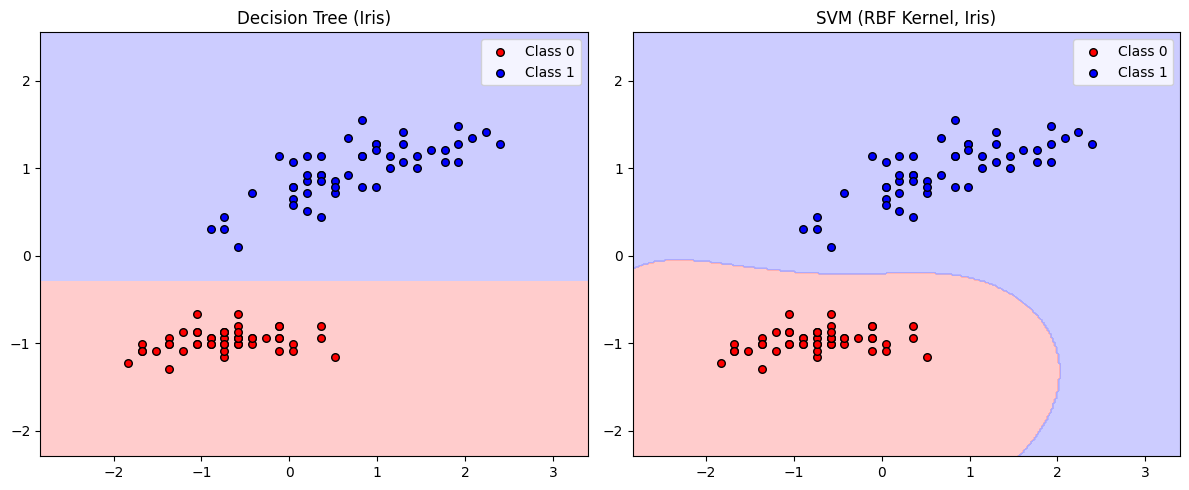

In [10]:
# Train models and plot boundaries
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_scaled, y)
svm = SVC(kernel='rbf', C=1)
svm.fit(X_scaled, y)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(tree, X_scaled, y, axes[0], "Decision Tree (Iris)")
plot_decision_boundary(svm, X_scaled, y, axes[1], "SVM (RBF Kernel, Iris)")
plt.tight_layout()
plt.show()

## 🌙 2. Non-Linear Dataset: make_moons
`make_moons` is a classic toy dataset for testing non-linear classifiers.

In [4]:
from sklearn.datasets import make_moons

# Generate make_moons dataset
X_moon, y_moon = make_moons(n_samples=300, noise=0.2, random_state=42)
X_moon_scaled = StandardScaler().fit_transform(X_moon)

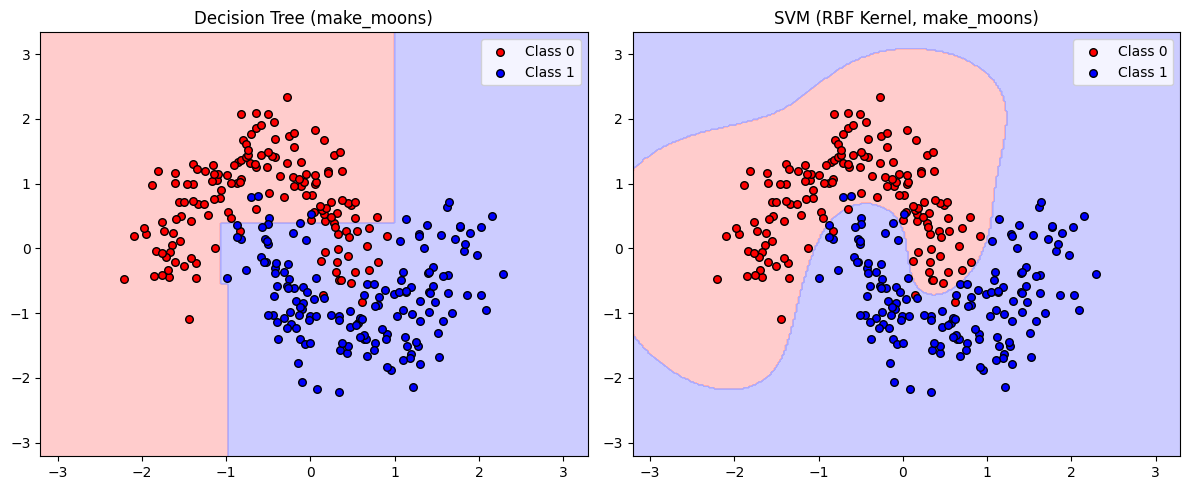

In [ ]:
# Train models and plot decision boundaries
tree_moon = DecisionTreeClassifier(max_depth=4)
tree_moon.fit(X_moon_scaled, y_moon)
svm_moon = SVC(kernel='rbf', C=1)
svm_moon.fit(X_moon_scaled, y_moon)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(tree_moon, X_moon_scaled, y_moon, axes[0], "Decision Tree (make_moons)")
plot_decision_boundary(svm_moon, X_moon_scaled, y_moon, axes[1], "SVM (RBF Kernel, make_moons)")
plt.tight_layout()
plt.show()